# NAMA : MUHAMAD RAIHAN MAULANA ZAQI
# NIM  : 09011382328147

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

In [7]:
df_train = pd.read_csv("c:\\RoyDM\\heart_disease_uci.csv")

In [12]:
display(df_train.head())
display(df_train.tail())


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [16]:
import pandas as pd
df = pd.read_csv('c:\\RoyDM\\heart_disease_uci.csv')  

In [17]:
print("Informasi Dataset:")
df.info()
print("\n")

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB




In [20]:
print ("kolom cek nilai yang hilang")
print(df.isnull().sum())

kolom cek nilai yang hilang
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [21]:
numeric_df = df.select_dtypes(include=['number'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = (numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.55 * IQR))
outliers_count = outliers.sum()

print("\nJumlah Outliers pada setiap kolom numerik:")
print(outliers_count)


Jumlah Outliers pada setiap kolom numerik:
id            0
age           0
trestbps     28
chol        181
thalch        2
oldpeak      15
ca           20
num           0
dtype: int64


In [24]:
print ("median")
display(df.median(numeric_only=True))
print ("mode")
display(df.mode().iloc[0])
print ("skew")
display(df.skew(numeric_only=True))
print ("kurt")
display(df.kurt(numeric_only=True))



median


id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64

mode


id                     1
age                 54.0
sex                 Male
dataset        Cleveland
cp          asymptomatic
trestbps           120.0
chol                 0.0
fbs                False
restecg           normal
thalch             150.0
exang              False
oldpeak              0.0
slope               flat
ca                   0.0
thal              normal
num                  0.0
Name: 0, dtype: object

skew


id          0.000000
age        -0.195994
trestbps    0.213334
chol       -0.613836
thalch     -0.211119
oldpeak     1.041427
ca          1.165978
num         0.968880
dtype: float64

kurt


id         -1.200000
age        -0.382930
trestbps    2.958664
chol        0.062273
thalch     -0.479725
oldpeak     1.127069
ca          0.199498
num        -0.104325
dtype: float64

In [30]:
display(df.corr(numeric_only=True))


,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


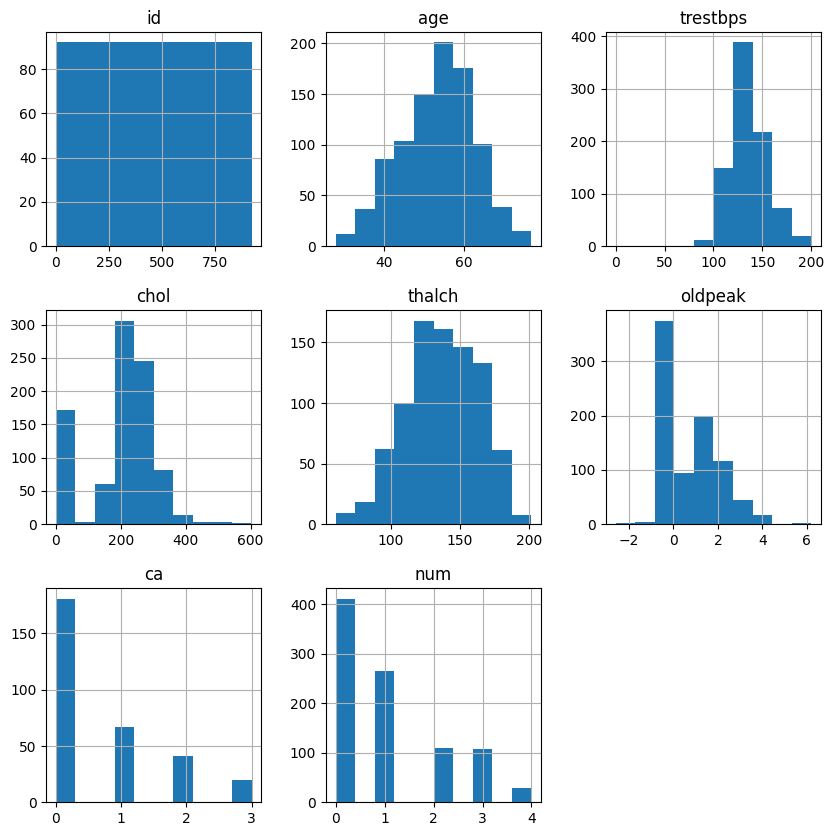

In [35]:
df.hist(figsize=(10,10))
plt.show()


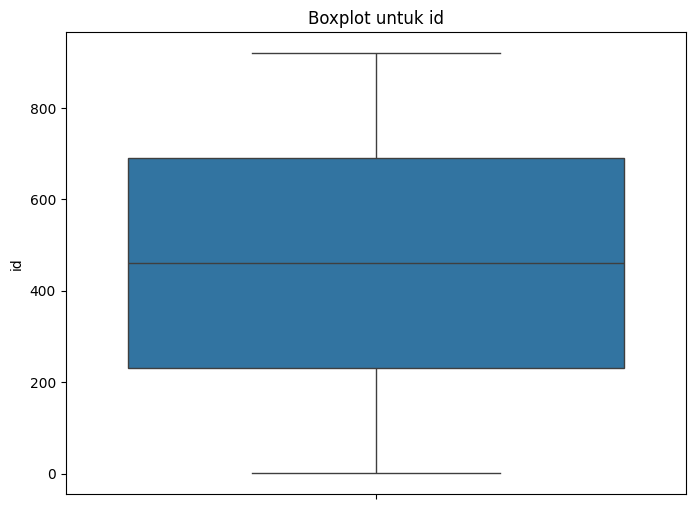

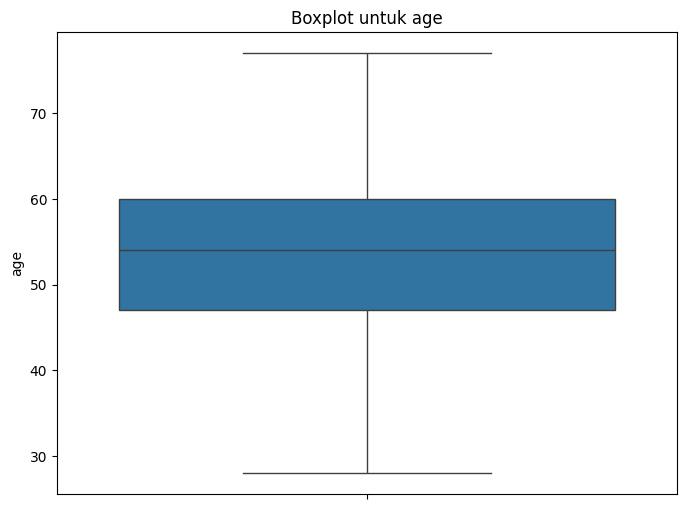

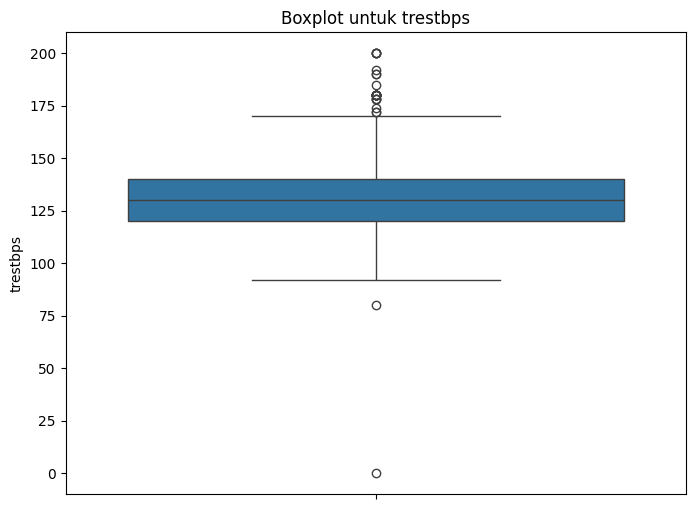

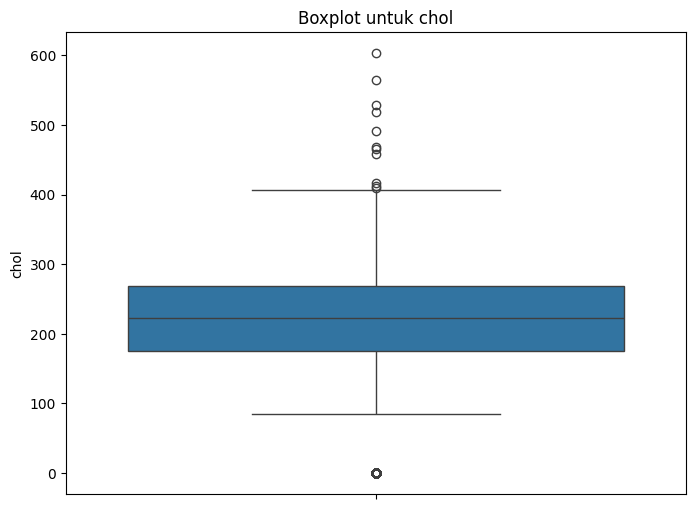

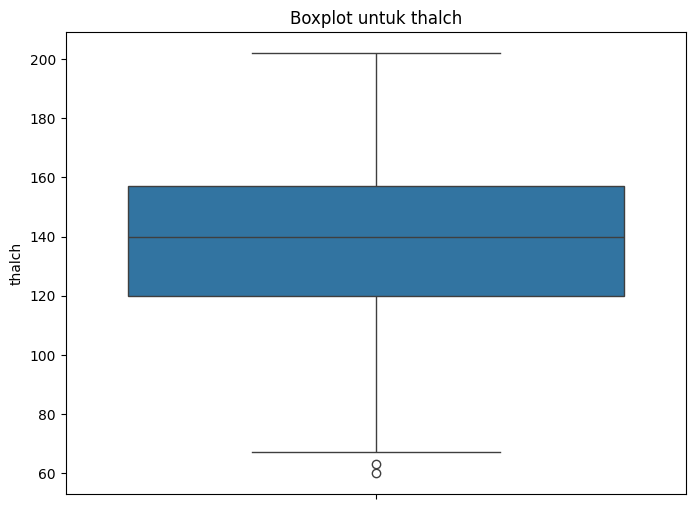

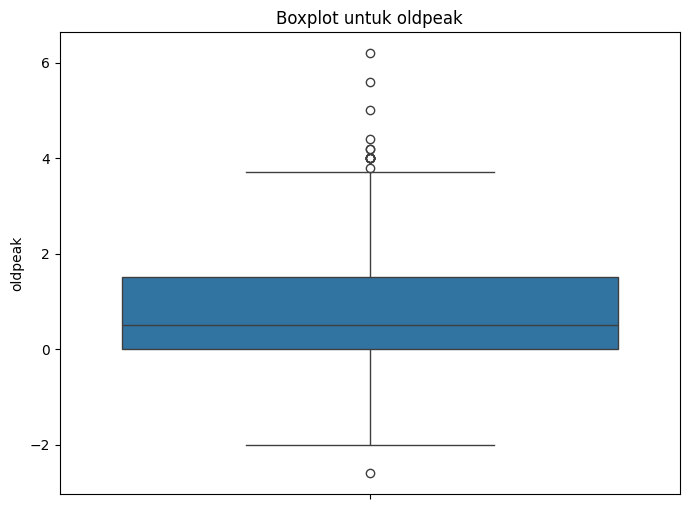

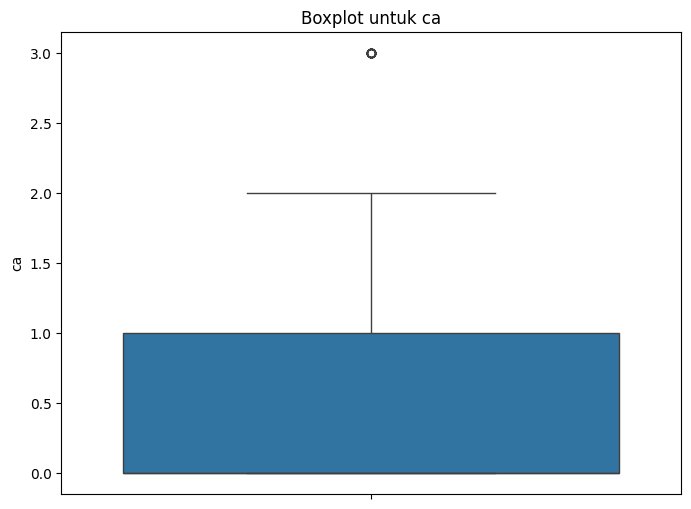

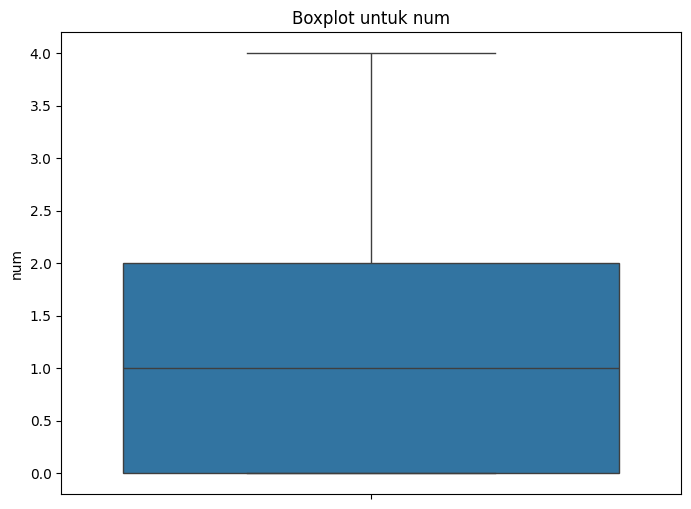

In [41]:
numeric_columns = df.select_dtypes(include=['number']).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot untuk {column}')
    plt.show()

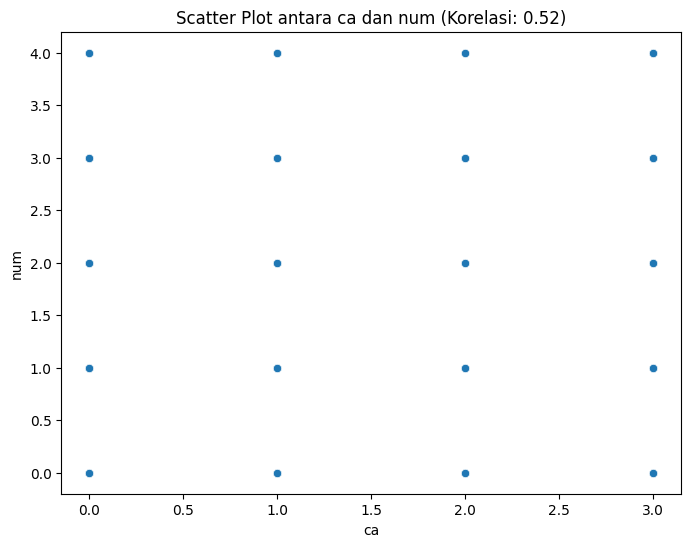

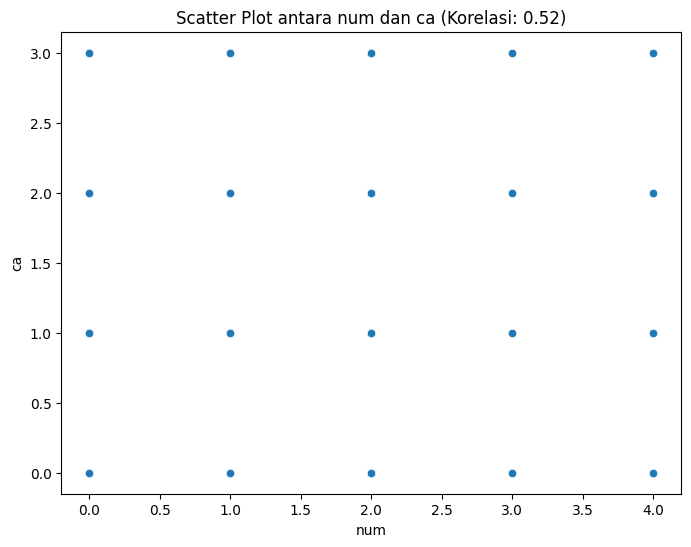

In [50]:

numeric_columns = df.select_dtypes(include=['number'])


correlation = numeric_columns.corr()


high_corr_pairs = correlation[(correlation > 0.5) & (correlation < 1)].stack().reset_index()
high_corr_pairs.columns = ['Var1', 'Var2', 'Correlation']


for index, row in high_corr_pairs.iterrows():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[row['Var1']], y=df[row['Var2']])
    plt.title(f'Scatter Plot antara {row["Var1"]} dan {row["Var2"]} (Korelasi: {row["Correlation"]:.2f})')
    plt.xlabel(row['Var1'])
    plt.ylabel(row['Var2'])
    plt.show()


# LAPORAN

Berdasarkan eksplorasi data ini, beberapa penemuan signifikan meliputi:
1. Distribusi yang tidak normal pada beberapa variabel seperti 'oldpeak' dan 'ca'.
2. Korelasi yang cukup kuat antara 'ca' dan 'num', serta 'oldpeak' dan 'num', yang dapat menjadi indikator penting dalam analisis lebih lanjut.
3. Kehadiran outliers dalam beberapa variabel yang mungkin perlu penanganan lebih lanjut, seperti melalui normalisasi atau transformasi data.